<a href="https://colab.research.google.com/github/JuanArmas/BigData7RO/blob/main/Laberinto_DFS_JuanArmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laberinto__Juan Armas Alemán

# Explicacion del código.

<h1> Importación de bibliotecas y módulos

- Importa la biblioteca **matplotlib** para importar los módulos pyplot (que nos permitirá crear la visualización del laberinto) y al módulo **colors** para acceder a su submódulo, **ListedColorMap**, el cual nos dejará jugar con los colores del laberinto.

- Importa la biblioteca **numpy** que nos facilitará el uso de las distintas matrices bidimensionales y para las funciones que usaremos para la DFS.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

<h1> Creación de la clase Place

Crearemos objetos de tipo Place con coordenadas de fila y columna para almacenarlas como atributos del objeto para su uso

In [ ]:
class Place:
    def __init__(self, fila, columna):
        self.fila = fila
        self.columna = columna

<h1> Inicializamos Laberinto:

Creamos la matriz laberinto de 10x10 inicializado a cero.

Marcamos los bordes de dicho laberinto igualandolo a 1, de esta manera, más adelante indicaremos los colores según el valor de la casilla.

Finalmente pedimos a la función que nos devuelva el resultado para poder llamarla cuando haga falta.

In [ ]:
def inicializar_laberinto():
    laberinto = np.zeros((10, 10), dtype=int)
    laberinto[:, 0] = 1
    laberinto[:, -1] = 1
    laberinto[0, :] = 1
    laberinto[-1, :] = 1
    return laberinto

<h1> Definimos punto de inicio y de fin

A la función le pasamos por parámetro la matriz, y las coordenadas de inicio y de fin de recorrido. Esta función se encarga de reconocer esas coordenadas y asignarles un valor numérico para poder darle el color necesario en todo momento.

In [ ]:
def marcar_puntos_inicio_y_fin(laberinto, inicio, objetivo):
    laberinto[inicio] = 2
    laberinto[objetivo] = 3

<h1> Marcamos los obstáculos

La función de este método es igual que la del anterior. Le pasamos por parámetro la matriz y una lista de tuplas donde estarán reflejadas las coordenadas de cada muro interior, los cuales las igualamos a 1 dentro de este método para que tenga el color de un muro.

In [ ]:
def marcar_obstaculos(laberinto, obstaculos):
    for obstaculo in obstaculos:
        laberinto[obstaculo] = 1


<h1> Busqueda del camino óptimo

Aquí es donde recorreremos el laberinto usando DFS (Búsqueda en profundidad) desde el punto de inicio hasta el punto objetivo.

1) la función recibe por parámetro la estructura del laberinto, las coordenadas de inicio y fin del agente, el número de intentos acumulado y una lista de celdas por las que ya haya pasado.

2)Verifica si el agente está en la celda objetivo o no, en caso que no, explora las celdas vecinas en busca de los posibles movimientos (!=1) y comienza la recursividad. Si se encuentra un camino desde la nueva posición, se agrega la celda actual al camino y se devuelve el camino encontrado hasta el momento, el número total de intentos y el número de pasos tomados.

3) Si no se encontrara ningún camino (se quedase sin celdas = 0 por las que no haya pasado), devuelve una lista vacia, num de intentos y 0 pasos.

In [ ]:
def encontrar_camino(laberinto, inicio, objetivo, visitados=None, intentos=0):
    if visitados is None:
        visitados = set()

    filas, columnas = len(laberinto), len(laberinto[0])
    fila, columna = inicio

    if (fila, columna) == objetivo: #comprobamos si el agente está en el objetivo
        return [(fila, columna)], 1, 0

    move = [[0, -1], [1, 0], [0, 1], [-1, 0]]

    for nr, nc in move: #Verificación de los posibles movimientos desde la celda actual.
        nueva_fila = fila + nr
        nueva_columna = columna + nc
        no_es_muro = laberinto[nueva_fila][nueva_columna] != 1
        fila_en_rango = 0 <= nueva_fila < filas #verifica que la nueva posición esta dentro de los limites del laberinto
        columna_en_rango = 0 <= nueva_columna < columnas #idem ^

#Explora las celdas adyacentes si son !=1
        if fila_en_rango and columna_en_rango and no_es_muro and (nueva_fila, nueva_columna) not in visitados:
            visitados.add((nueva_fila, nueva_columna))
            camino, intentos_recursivos, pasos = encontrar_camino(laberinto, (nueva_fila, nueva_columna), objetivo, visitados, intentos+1)
            intentos += intentos_recursivos

            if camino: #recursión hasta encontrar posición válida de movimiento
                return [(fila, columna)] + camino, intentos, pasos + 1

    return [], intentos, 0 # Es el break de la recursión en caso que llegue a callejon sin salida

<h1> Creación visual del laberito:

- En este punto es donde se muestra de manera visual el laberinto y su recorrido, recibiendo por parámetro ellaberinto y el camino en caso de haber encontrado alguno en la función anterior.

detallo los puntos mas relevantes:

1)  se configuran los límites del laberinto con el xlim/ylim.

2) Se cuadricula todo el laberinto con el gca y pone marcas (x,y) en cada celda.Básicamente rueda 0.5 unidades tanto el eje x y el eje y para que cuando se muestre, no aparezca la marca en un lateral de la celda sino en el centro. (el centro entre -0.5 y 0.5, que son las marcas de las columnas o filas, es 0)

3) el condicional muestra el laberinto o un mensaje de error en caso de no haber encontrado ningún recorrido.

In [ ]:
def mostrar_laberinto(laberinto, camino=None):
    colorMap = ListedColormap(["white", "gray", "orange", "green"])
    plt.figure()
    plt.imshow(laberinto, cmap=colorMap)
    plt.xlim(-0.5, len(laberinto[0]) - 0.5)
    plt.ylim(-0.5, len(laberinto) - 0.5)
    plt.gca().set_xticks(np.arange(-0.5, len(laberinto[0]) - 0.5, 1), minor=True)
    plt.gca().set_yticks(np.arange(-0.5, len(laberinto) - 0.5, 1), minor=True)
    plt.grid(which="minor", color="black", linestyle='-', linewidth=1.09)

    if camino:
        for paso, (fila, columna) in enumerate(camino):
            plt.text(columna, fila, str("x"), ha='center', va='center', color='orange', fontsize=10, fontweight='bold')
    else:
        plt.text(len(laberinto[0]) // 2, len(laberinto) // 2, "No hay camino válido para llegar al punto final.", ha='center',
                 va='center', color='red', fontsize=12, fontweight='bold')

    plt.show()


<h1> Metodo Main para ejecutar todo y mostrar los resultados:

Aquí se inicializa el laberinto, se definen los puntos de inicio y fin (objetivo) y se crean los obstáculos.

Ejecuta la función encontrar_camino() para empezar la búsqueda en profundidad y se imprimen los resultados.

In [ ]:
def main():
    laberinto = inicializar_laberinto()

    # Puntos de inicio (naranja) y objetivo (verde)
    inicio = (8, 1)
    objetivo = (1, 8)
    # inicio = (1, 1)
    # objetivo = (8, 8)

    obstaculos = [(1, 5), (1, 7), (2, 1), (2, 3), (2, 4), (2, 5), (2, 7), (3, 7), (4, 1), (4, 2), (4, 3), (4, 4),
                  (4, 5), (4, 7), (6, 3), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 5), (8, 7)]

    marcar_puntos_inicio_y_fin(laberinto, inicio, objetivo)
    marcar_obstaculos(laberinto, obstaculos)

    camino, intentos, pasos = encontrar_camino(laberinto, inicio, objetivo)

    if camino:
        print(f"Se encontró un camino válido para llegar al punto final en {intentos} intentos.")
        print(f"El agente ha dado {pasos} pasos en este intento para llegar al punto final.")
        print("Desglose del recorrido del agente:")
        for paso, (fila, columna) in enumerate(camino):
            print(f"Paso {paso + 1}: Fila {fila}, Columna {columna}")
    else:
        print(f"No hay camino válido para llegar al punto final en {intentos} intentos.")

    mostrar_laberinto(laberinto, camino)

Se encontró un camino válido para llegar al punto final en 3733 intentos.
El agente ha dado 20 pasos en este intento para llegar al punto final.
Desglose del recorrido del agente:
Paso 1: Fila 1, Columna 1
Paso 2: Fila 1, Columna 2
Paso 3: Fila 2, Columna 2
Paso 4: Fila 3, Columna 2
Paso 5: Fila 3, Columna 3
Paso 6: Fila 3, Columna 4
Paso 7: Fila 3, Columna 5
Paso 8: Fila 3, Columna 6
Paso 9: Fila 4, Columna 6
Paso 10: Fila 5, Columna 6
Paso 11: Fila 5, Columna 5
Paso 12: Fila 5, Columna 4
Paso 13: Fila 6, Columna 4
Paso 14: Fila 7, Columna 4
Paso 15: Fila 8, Columna 4
Paso 16: Fila 8, Columna 5
Paso 17: Fila 8, Columna 6
Paso 18: Fila 7, Columna 6
Paso 19: Fila 7, Columna 7
Paso 20: Fila 7, Columna 8
Paso 21: Fila 8, Columna 8


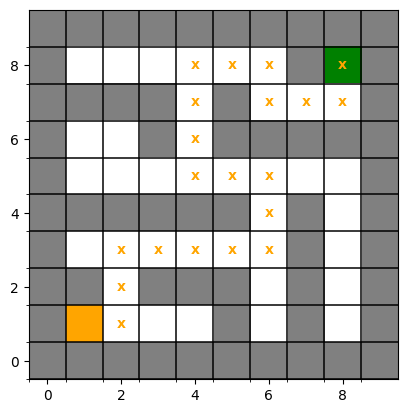

In [ ]:
#if __name__ == "__main__":
main()